# Step-wise comparison AoB2015
The results from Schymanski et al. (2015) are used as a benchmark and starting point from the current analysis. Several adjustmens have been made in the general set-up of the model, the effects of these choices are assessed in a stepwise approach:

0. Benchmark data
1. Reproducing benchmark results
2. Repeat SCE with input data AoB2015
3. Change the modelling period
4. Change atmospheric CO$_2$ to MaunaLoa records
5. Change soil layer thickness
6. Change atmospheric pressure from fixed to variable
7. Add rooting depth grasses as optimizable property
8. Change costfactor for water transport
9. Update the weatherdata with new SILO-data
10. Change hydrological schematization to free-draining conditions
11. Change hydrological schematization to dynamic water tables
12. Change soil parameters


## Reproducing benchmark results


In [4]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook
import warnings
warnings.filterwarnings("ignore")

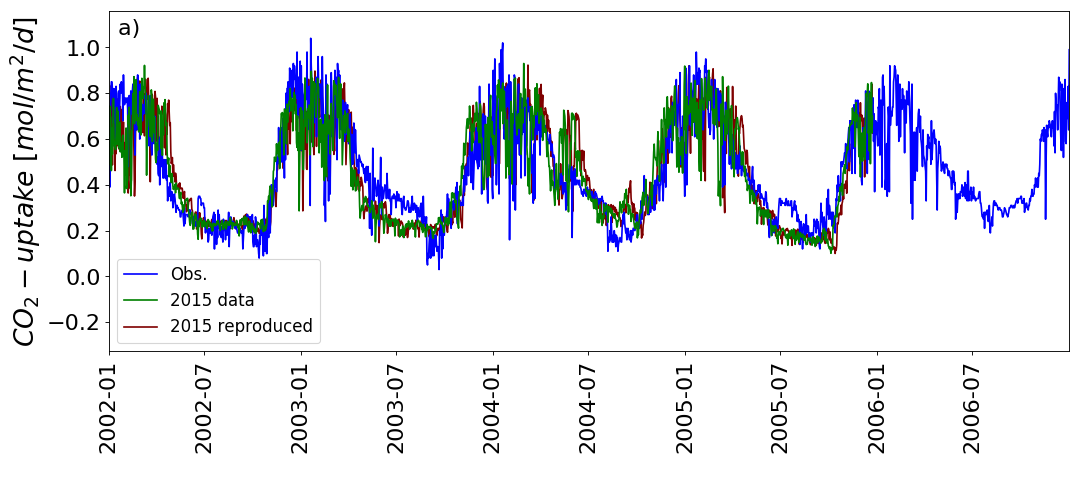

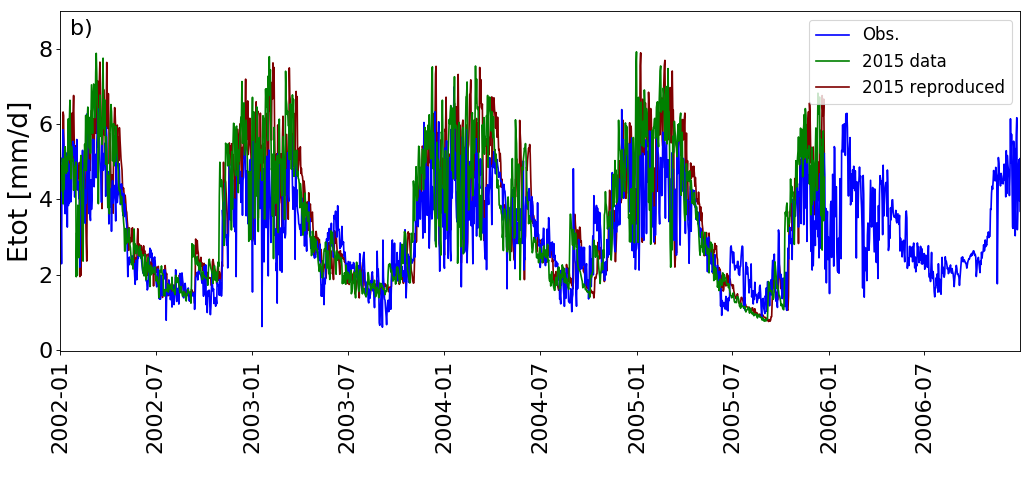

In [12]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "2015 reproduced" --title "a) " --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "2015 reproduced" --title "b)" --legend True


**Figure S1.1.** Comparison for Howard Springs between the results of Schymanski et al. (2015) (green) and a reproduction of those results (brown) based on the best run of the SCE-algorithm from Schymanski et al. (2015), for a) assimilation and b) evaporation. In other words, the vegetation properties are not re-optimized and both model runs use the same vegetation properties. The results should therefore be completely identical. This is mostly the case, except for a small shift due to un-even years, which was not taken into account in the original data.

## Repeat SCE

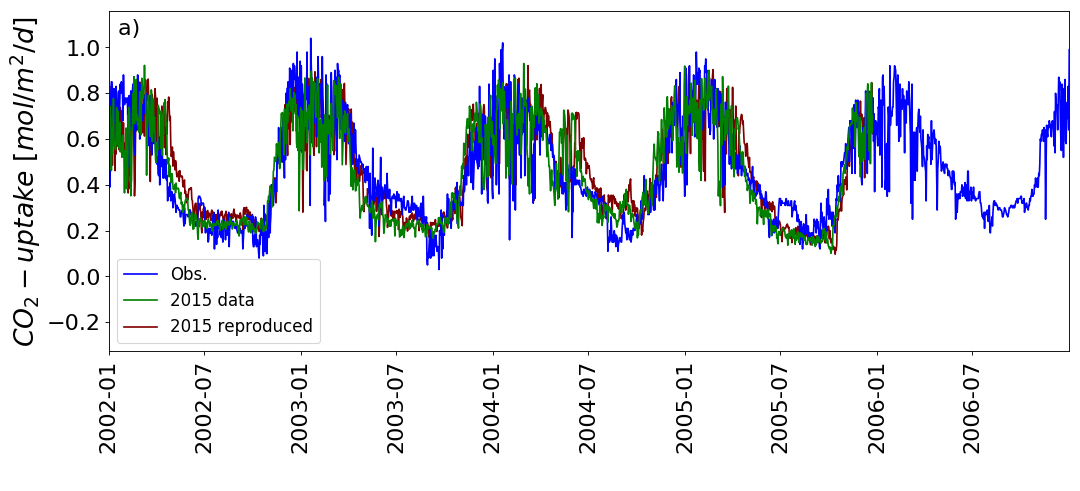

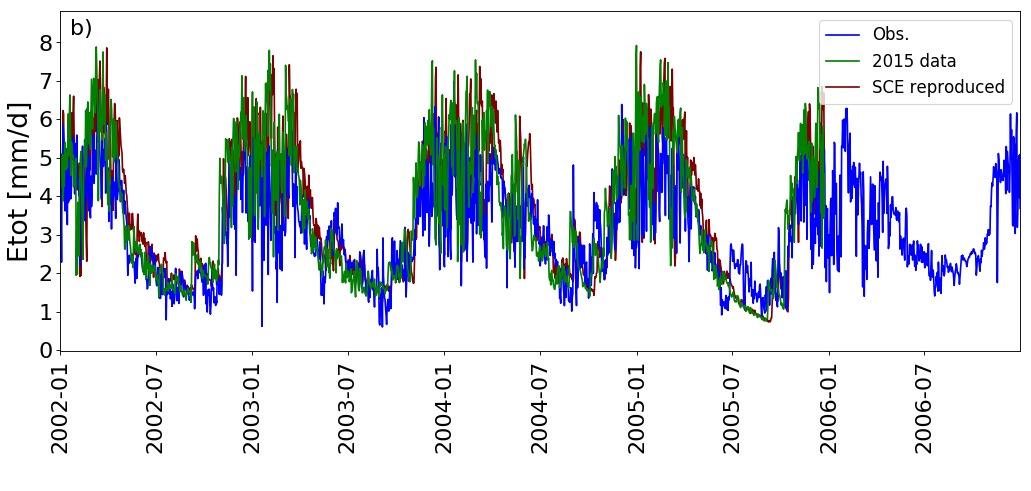

In [17]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "SCE reproduced" --title "a) " --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "SCE reproduced" --title "b)" --legend True

**Figure S1.2.** Comparison for Howard Springs between the results of Schymanski et al. (2015) (green) and reproduced results (brown) by repeating the SCE-algorithm with the same settings and parameterization of Schymanski et al. (2015), for a) assimilation and b) evaporation. Theoretically, the results should be extremely similar, as the optimization should converge to similar vegetation properties. The differences between the results of Schymanski et al. (2015) and the reproduced results are minor, but a shift due to un-even years remains. 

## Change of modelling period


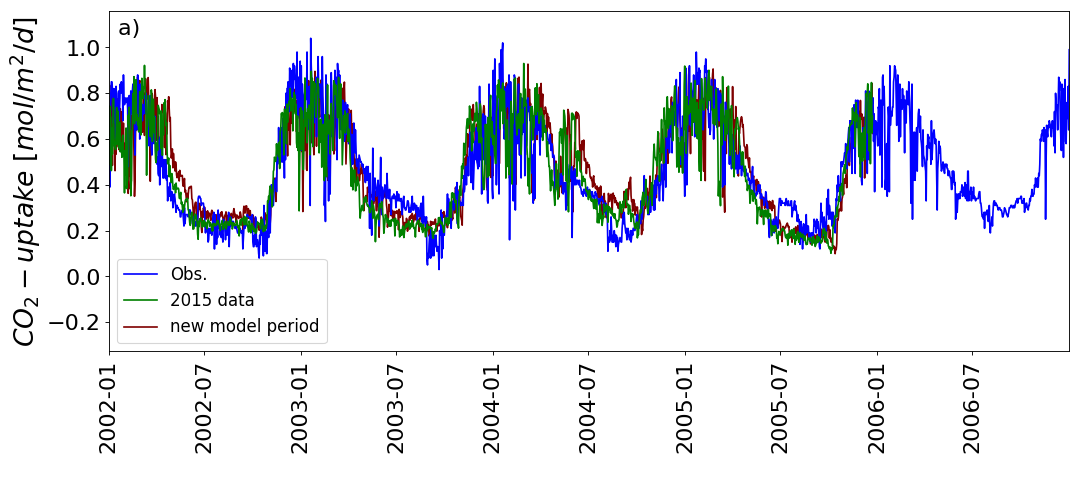

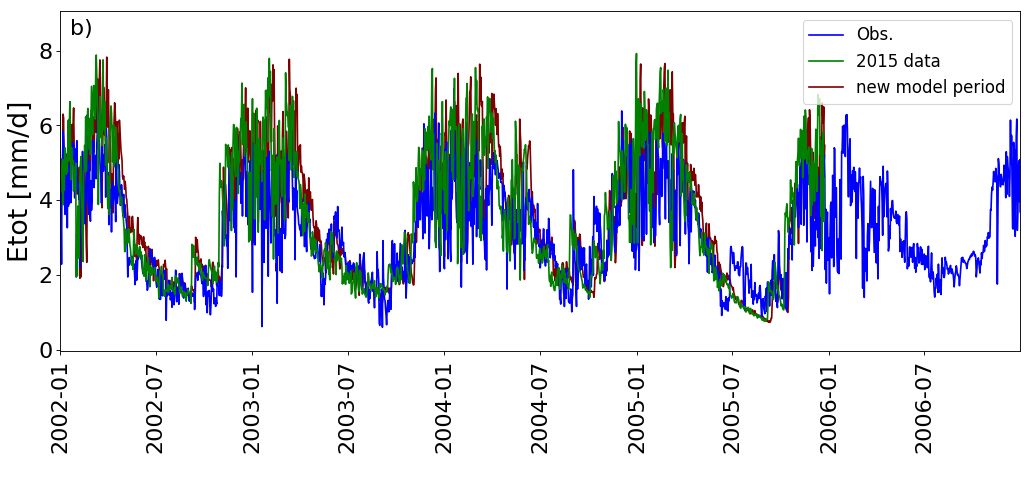

In [18]:
#results still on HPC

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "new model period" --title "a) " --legend True


%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]"  \
--labels "new model period" --title "b)" --legend True

**Figure S1.3.** Comparison for Howard Springs between the results of Schymanski et al. (2015), where the model period was set from 1976 untill 2005, and new runs that start from 1980 untill 2017, with a) assimilation and b) evaporation. Small differences can be observed, but in a similar order of magnitude as when the SCE-algorithm is re-run (see Figure S1.2).


## Change of atmospheric CO$_2$-values


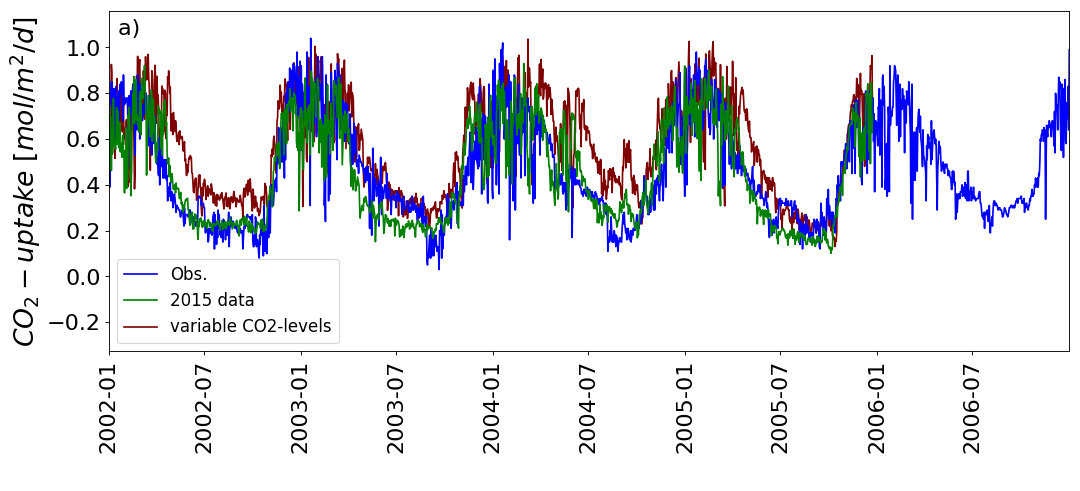

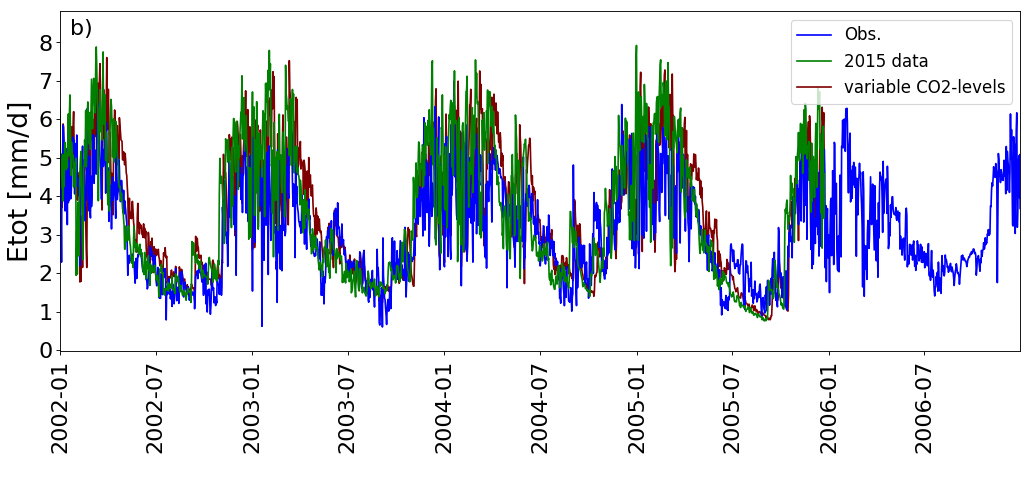

In [19]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "variable CO2-levels" --title "a) " --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "variable CO2-levels" --title "b) " --legend True

**Figure S1.4**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where atmospheric CO$_2$-values were fixed at 317ppm (green) and new runs that use the MaunaLoa-records as input with variable $CO_2$-levels (brown), for a) assimilation and b) evaporation. The declining limbs of the curves for assimilation differ, but the results for evaporation do not show such big differences. The values for atmospheric CO$_2$-levels are generally higher, leading therefore also to higher values of assimilation. 

## Change of soil layer thickness


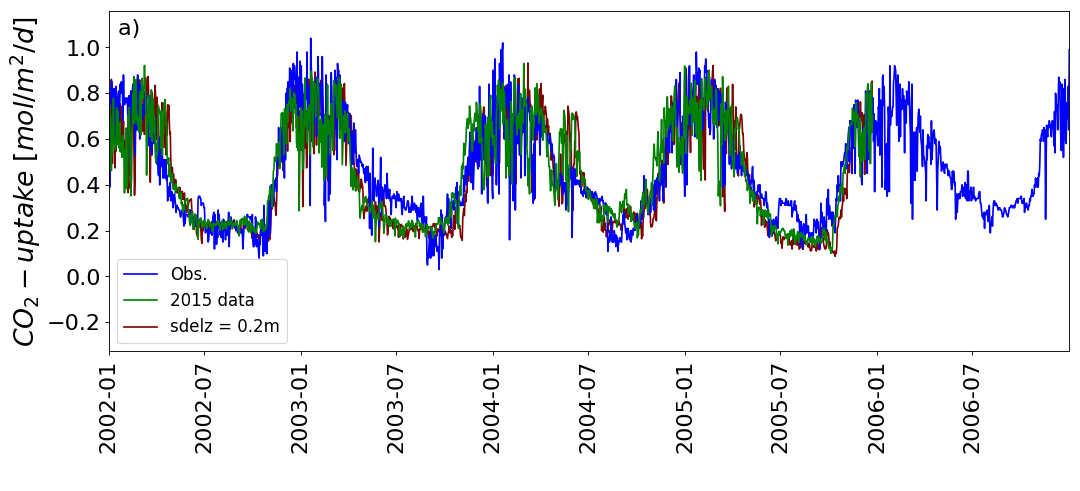

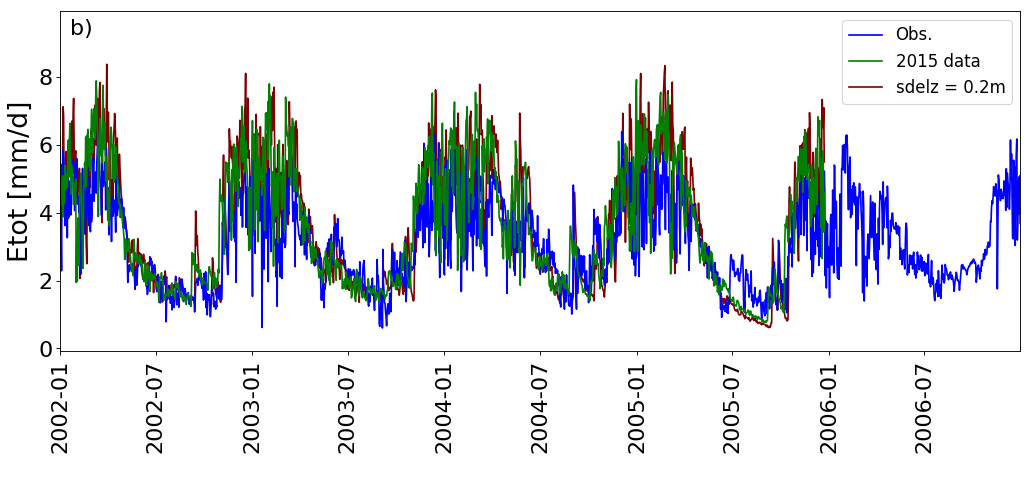

In [20]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "sdelz = 0.2m" --title "a) " --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "sdelz = 0.2m" --title "b) " --legend True

**Figure S1.5**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where soil layer thickness was set at 0.5m (green) and new runs that use use a soil layer thickness of 0.2m (brown), for a) assimilation and b) evaporation. The results for evaporation and assimilation have differences, but the differences are generally small and similar as differences occuring after re-running the SCE-optimization (Figure S1.2).


## Change of atmosperic pressures


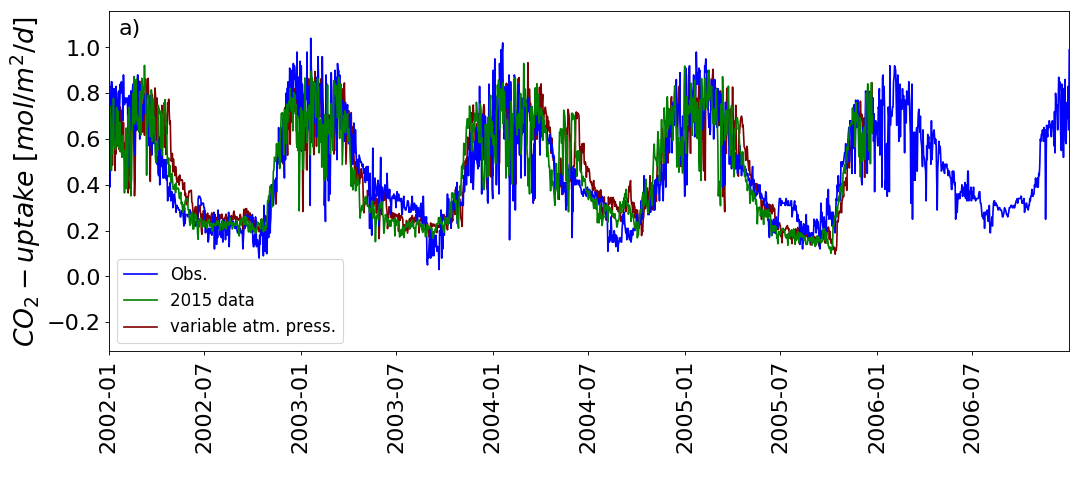

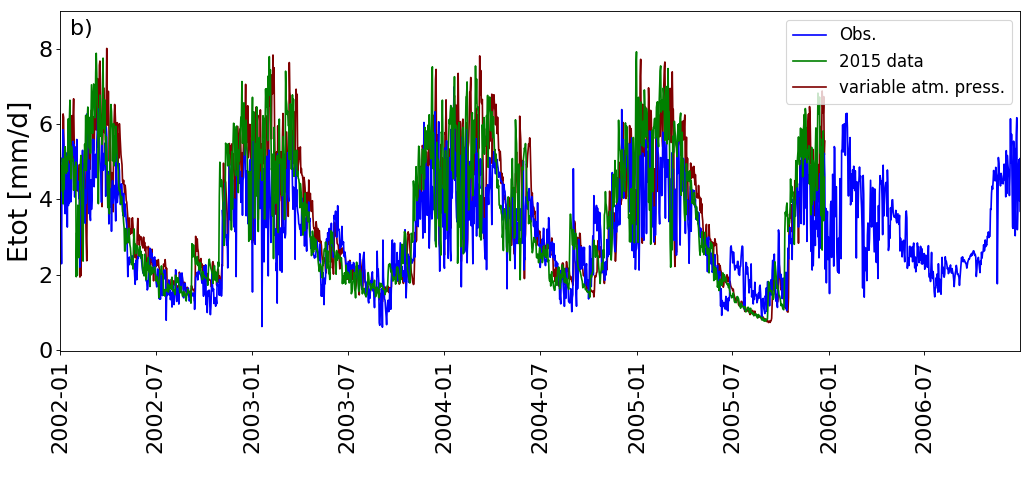

In [21]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "variable atm. press." --title "a)" --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "variable atm. press." --title "b)" --legend True

**Figure S1.6**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where atmosperic pressure was fixed at 1013.25 hPa (green) and new runs that use variable levels obtained from the SILO meteorological data (brown), for a) assimilation and b) evaporation. The results for evaporation and assimilation have differences, but the differences are generally small and similar as differences occuring after re-running the SCE-optimization (Figure S1.2).

## Optimizing rooting depths grasses

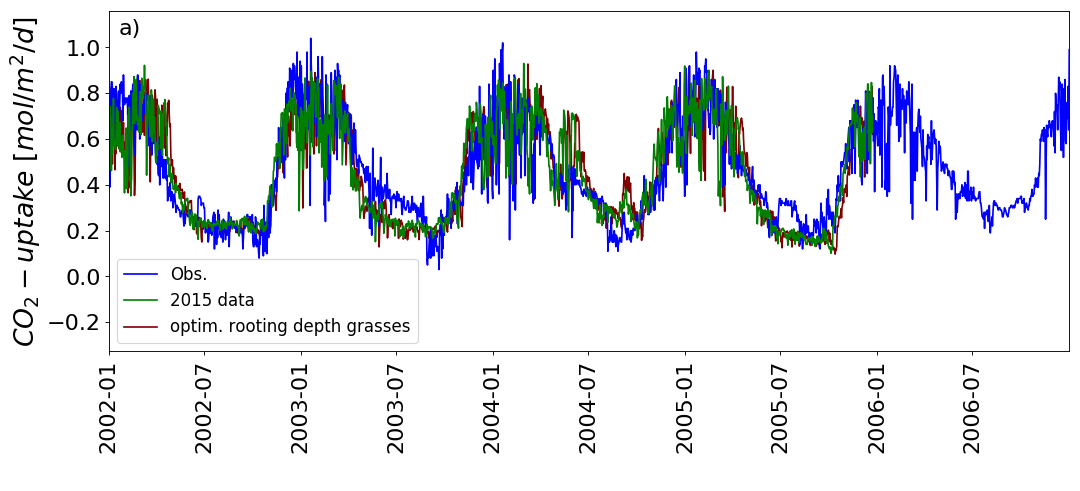

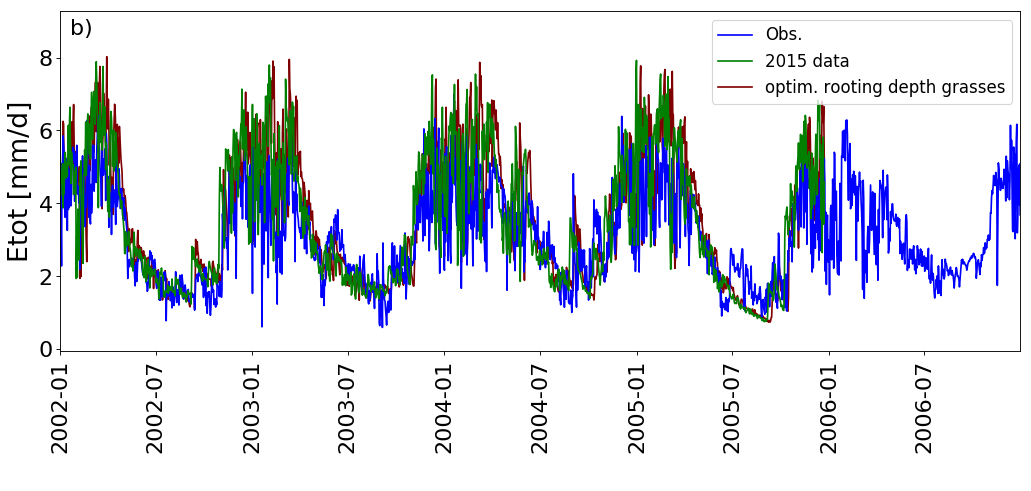

In [22]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "optim. rooting depth grasses" --title "a)" --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "optim. rooting depth grasses" --title "b)" --legend True


**Figure S1.7**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where grass rooting depths were fixed at 1.0m (green) and new runs that optimize the rooting depth of grasses (brown), for a) assimilation and b) evaporation.The results for the fluxes are rather similar eventually, but the final rooting depths are different. In the new runs, rooting depth for grasses reaches 0.5m and trees 4m, whereas results of Schymanski et al. (2015) converged to 4.2m for trees.

## Costfactor for water transport capacity

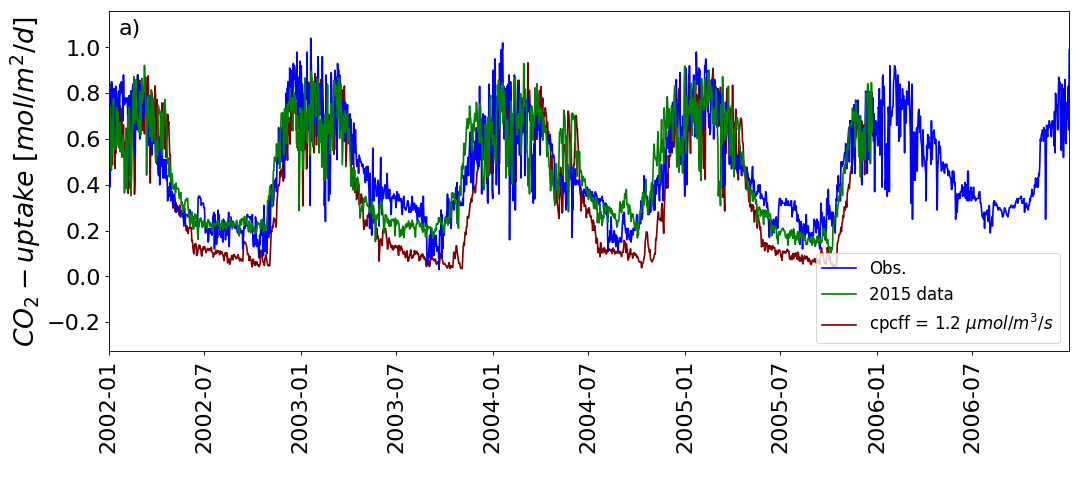

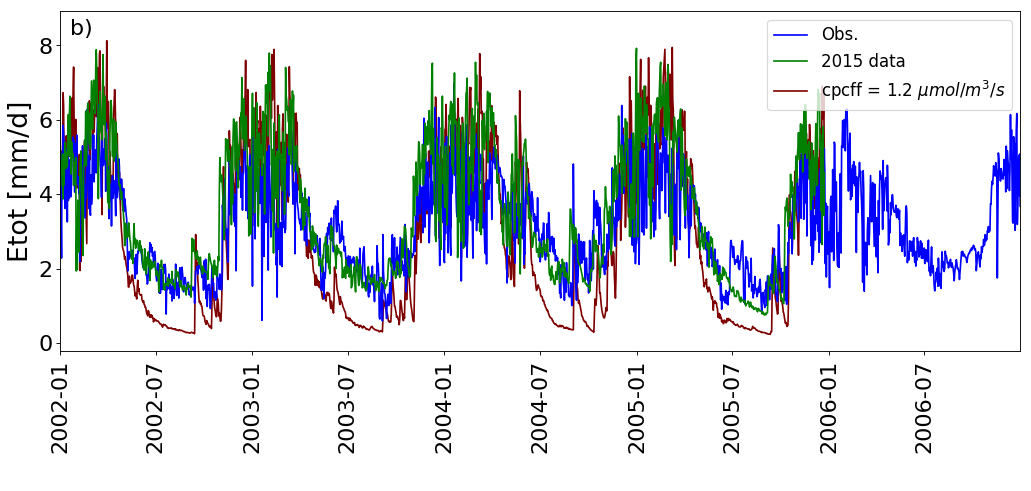

In [24]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "$CO_2-uptake$ $[mol/m^2/d]$" \
--labels "cpcff = 1.2 $\mu mol/m^3/s$" --title "a)" --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "cpcff = 1.2 $\mu mol/m^3/s$" --title "b)" --legend True

**Figure S1.8**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where the costfactor for water transport capacity was set at 1.0 $\mu mol/m3/s$ (green) and new runs that use is set to 1.2 $\mu mol/m3/s$ (brown), for a) assimilation and b) evaporation. There is a strong difference in the two model runs with different values for the costfactor for water transport. Especially during the wet period the values for assimilation and evaporation are much lower for a higher costfactor.



## Weatherdata

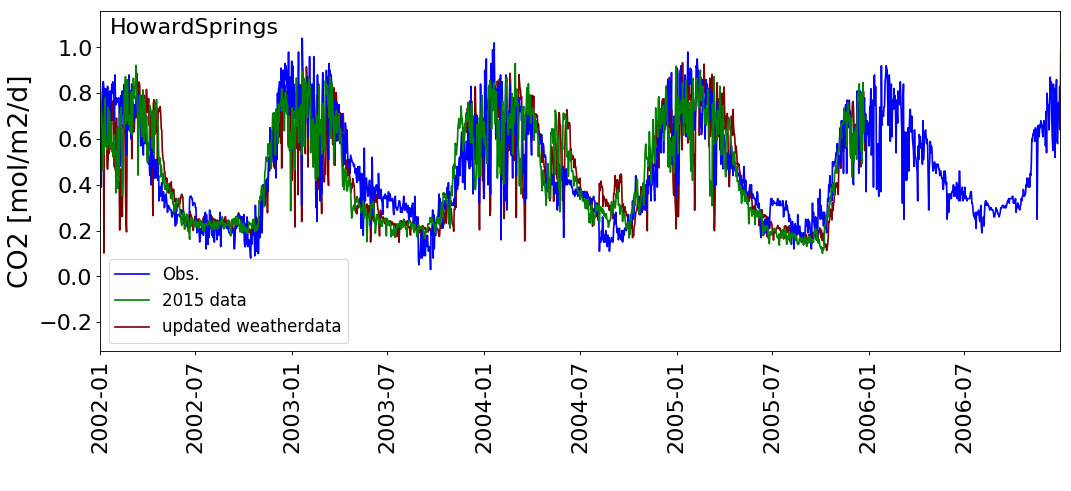

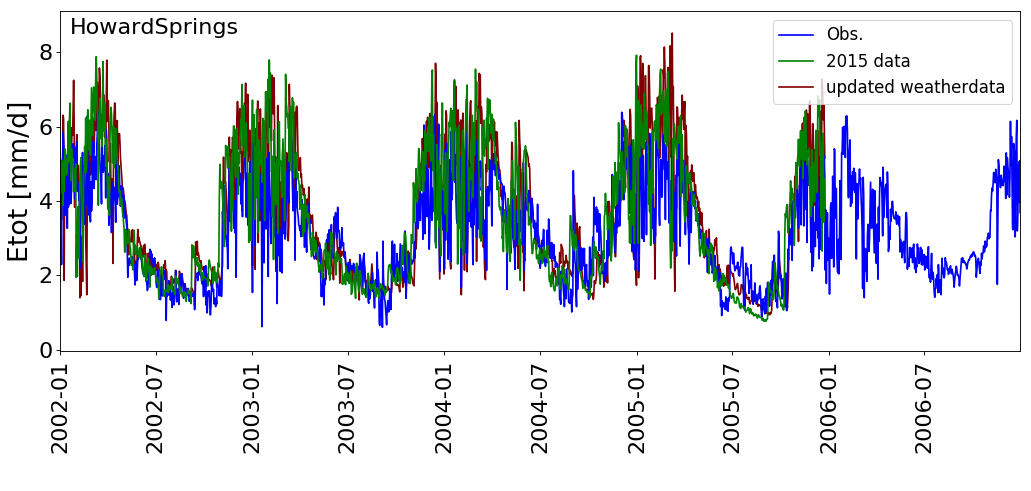

In [25]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "updated weatherdata" --title "HowardSprings" --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "updated weatherdata" --title "HowardSprings" --legend True

**Figure S1.9**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use a new version of SILO-datadrill, including variable atmosperic levels (brown), for a) assimilation and b) evaporation. The model runs only show minor differences, similar to differences obtained by re-running the SCE-optimization (Figure S1.2).

## New soil parameters and hydrology

In [26]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--labels "Reduced Ksat" --title "HowardSprings" --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "Reduced Ksat" --title "HowardSprings" --legend True

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt \
-v zw --var2015 ys -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Water table [m]" \
--labels "Reduced Ksat" --title "HowardSprings" --legend True

OSError: ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt not found.

OSError: ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt not found.

OSError: ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt not found.

**Figure S1.10**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use new soil parameters based on the Soil and Landscape Grid of Australia  and free draining hydrological parameters (brown), for a) assimilation b) evaporation, c) groundwater tables.


The model runs only show minor differences, similar to differences obtained by re-running the SCE-optimization (Figure S1.2).


Hydraulic conductivity for the new runs was set to $2.5 10^{-6} m/s$, similar as reported by Whitley et al. (2016). Previously, this was set at $1.23 10^{-5} m/s$.


Reducing the hydraulic conductivity leads to higher values of evaporation and assimilation, which is due to higher groundwater tables.